# TRABAJO DATA VISUALIZATION 
## Limpieza y analisis de la base de datos Pollution 

### Esquema de trabajo:

* Estraccion de datos a traves de la lectura del csv 'pollution_us_2000_2016.csv'
* Realizacion de una copia de la informacion para mantener la integriedad de los datos originales
* Eliminar columnas que consideramos no relevantes en el analisis
* Renombrar las columnas a nombres intuitivos y en castellano
* Casting necesarios. Fecha como principal cambio
* Creacion de una nueva columna producto de otras de la tabla
* Diferentes analisis graficos de las variables tomando una muestra aleatoria de 3000 filas sobre los datos totales

In [1]:
import pandas as pd

In [2]:
#Lectura de la base de datos
pol = pd.read_csv('pollution_us_2000_2016.csv')
pol.head(2)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.0,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.0,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0


### Extraccion de datos a traves de la lectura del csv 'pollution_us_2000_2016.csv' y realizacion de una copia de la informacion para mantener la integriedad de los datos originales



In [3]:
#Copiando datos para no perder los originales
pollu = pol.copy()

In [6]:
pollu1 = pol.copy()

**Gracias a la funcion describe podemos ver de un vistazo un resumen y pequeño analisis de los datos para conocerlos mejor**

In [4]:
pol.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [5]:
# Lectura de las columnas de la tabla original
pollu.columns


Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

### Eliminar columnas que consideramos no relevantes en el analisis

Hemos considerado oportuno eliminar estas columnas para dejar la tabla con la informacion mas util para el analisis. Dejando los Estados, la media y maximos de cada gas contaminante.

Existen dos formas posibles, las haremos ambas a traves de copias. La forma 2 será la utilizada


In [6]:
#Eliminando columnas innecesarias. FORMA 1: LARGA

del pollu['Unnamed: 0']
del pollu['State Code']
del pollu['County Code']
del pollu['County']
del pollu['Site Num']
del pollu['NO2 Units']
del pollu['NO2 1st Max Hour']
del pollu['NO2 AQI']
del pollu['O3 Units']
del pollu['O3 1st Max Hour']
del pollu['O3 AQI']
del pollu['SO2 Units']
del pollu['SO2 1st Max Hour']
del pollu['SO2 AQI']
del pollu['CO Units']
del pollu['CO 1st Max Hour']
del pollu['CO AQI']

In [10]:
#Eliminando columnas innecesarias. FORMA 1: CORTA

pollu1.drop(columns=['Unnamed: 0', 'State Code', 'County Code', 'County', 'Site Num', 'NO2 Units', 'NO2 1st Max Hour',
                    'NO2 AQI', 'O3 Units', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units', 'SO2 1st Max Hour', 'SO2 AQI',
                    'CO Units', 'CO 1st Max Hour', 'CO AQI'], axis=1, inplace=True)
pollu1.head()

,Address,State,City,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,1.145833,4.2
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,0.878947,2.2
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,1.145833,4.2
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,0.878947,2.2
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,0.850000,1.6


### Renombrar las columnas a nombres mas intuitivos y en castellano

In [11]:
#Renombrar columnas 
p = pollu1.rename(columns=
                    {'Address':'Direccion', 'State':'Estado', 'City':'Ciudad', 'Date Local':'FechaLocal',
                    'NO2 Mean':'NO2media', 'NO2 1st Max Value':'NO2max', 'O3 Mean':'O3media', 'O3 1st Max Value':'O3max',
                    'SO2 Mean':'SO2media', 'SO2 1st Max Value':'SO2max', 'CO Mean':'COmedia', 'CO 1st Max Value':'COmax'})
p

,Direccion,Estado,Ciudad,FechaLocal,NO2media,NO2max,O3media,O3max,SO2media,SO2max,COmedia,COmax
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,1.145833,4.200
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,0.878947,2.200
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,1.145833,4.200
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,0.878947,2.200
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,0.850000,1.600
5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,1.066667,2.300
6,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.937500,2.6,0.850000,1.600
7,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.937500,2.6,1.066667,2.300
8,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-03,38.125000,51.0,0.007958,0.016,5.250000,11.0,1.929167,4.400
9,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-03,38.125000,51.0,0.007958,0.016,5.250000,11.0,1.762500,2.500


In [8]:
p.head()

,Direccion,Estado,Ciudad,FechaLocal,NO2media,NO2max,O3media,O3max,SO2media,SO2max,COmedia,COmax
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,1.145833,4.2
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,0.878947,2.2
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,1.145833,4.2
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,0.878947,2.2
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,0.850000,1.6


### Tipos de nuestros datos

Analizamos los tipos de datos de cada variable para ver posibles cateos necesarios. Como podemos observar todas las variables son correctas a excepcion de la Fecha que se podría castear a su formato optimo datetime

In [9]:
p.dtypes #Tipos de datos

Direccion      object
Estado         object
Ciudad         object
FechaLocal     object
NO2media      float64
NO2max        float64
O3media       float64
O3max         float64
SO2media      float64
SO2max        float64
COmedia       float64
COmax         float64
dtype: object

In [10]:
p[p.Ciudad == 'Phoenix']

,Direccion,Estado,Ciudad,FechaLocal,NO2media,NO2max,O3media,O3max,SO2media,SO2max,COmedia,COmax
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,1.145833,4.200
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,0.878947,2.200
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,1.145833,4.200
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,0.878947,2.200
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,0.850000,1.600
5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,1.066667,2.300
6,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.937500,2.6,0.850000,1.600
7,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.937500,2.6,1.066667,2.300
8,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-03,38.125000,51.0,0.007958,0.016,5.250000,11.0,1.929167,4.400
9,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-03,38.125000,51.0,0.007958,0.016,5.250000,11.0,1.762500,2.500


In [11]:
p_copy3 = p.copy()

In [12]:
p_copy3.head()

,Direccion,Estado,Ciudad,FechaLocal,NO2media,NO2max,O3media,O3max,SO2media,SO2max,COmedia,COmax
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,1.145833,4.2
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,0.878947,2.2
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,1.145833,4.2
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,0.878947,2.2
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,0.850000,1.6


### Casting de la fecha

Primero importamos las funcines necesarias para realizar el casting a datetime
Vamos a crear dos variables fuera de la funcion para poder pasarselas como argumento y que recorra todas las filas
Metemos la funcion en un try except para poder capturar los posibles errores y corregirlos
Por ultimo realizamos un apply que recorra toda la tabla

In [13]:
from datetime import date, datetime

In [14]:
#Casting de Fecha
formato = '%Y-%m-%d'
fecha = '2016-03-23'
def parsea_fecha(fecha):    
    try:
        date = datetime.strptime(fecha,formato)
        return(date)
    except:
        return None
    
p['FechaLocal'] = p.FechaLocal.apply(parsea_fecha)  
p.head()


,Direccion,Estado,Ciudad,FechaLocal,NO2media,NO2max,O3media,O3max,SO2media,SO2max,COmedia,COmax
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,1.145833,4.2
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,0.878947,2.2
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,1.145833,4.2
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,0.878947,2.2
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,0.850000,1.6


Podemos comprobar a traves de la funcion dtypes que los cambios realizados son correctos y que el tipo de dato de la variable FechaLocal ha pasado de ser object a datetime

In [15]:
p.dtypes

Direccion             object
Estado                object
Ciudad                object
FechaLocal    datetime64[ns]
NO2media             float64
NO2max               float64
O3media              float64
O3max                float64
SO2media             float64
SO2max               float64
COmedia              float64
COmax                float64
dtype: object

In [16]:
pco = p.copy

### Columna adicional producto de las demas

Realizamos una copia de seguridad por si necesitamos acudir a la tabla con los datos limpios

Una vez realizadas las transformaciones de datos necesarias, vamos a añadir un nueva columna que sea la suma de las poluciones maximas de cada gas, estado y fecha

In [17]:
# Añadimos una columna que sea el maximo de polucion total registrado

p['TotalPollutionMax'] = p[['NO2max', 'O3max', 'SO2max', 'COmax']].sum(axis=1)
p.head()

,Direccion,Estado,Ciudad,FechaLocal,NO2media,NO2max,O3media,O3max,SO2media,SO2max,COmedia,COmax,TotalPollutionMax
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,1.145833,4.2,62.240
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,0.878947,2.2,60.240
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,1.145833,4.2,59.840
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,0.878947,2.2,57.840
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Phoenix,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,0.850000,1.6,40.632


### Analisis grafico de las variables 

Para comenzar con el analisis vamos a importar las librerias necesarias

**Esquema de trabajo:**
* Plot general de cada variables para echar un vistazo a los datos
* Creacion de una muestra aleatoria de los datos para la mejor carga de los graficos. La muestra sera de 3000 filas aleatorias
* Creacion de un mapa de densidad del total maximo de la contaminacion por Estados, asi vemos un poco mas clara su distribucion
* Creacion de cada distribucion en funcion de la media de todos los gases en cada Estado. Un grafico por cada gas
* Creacion de los diferentes histogramas de cada gas para ver sus distribuciones

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

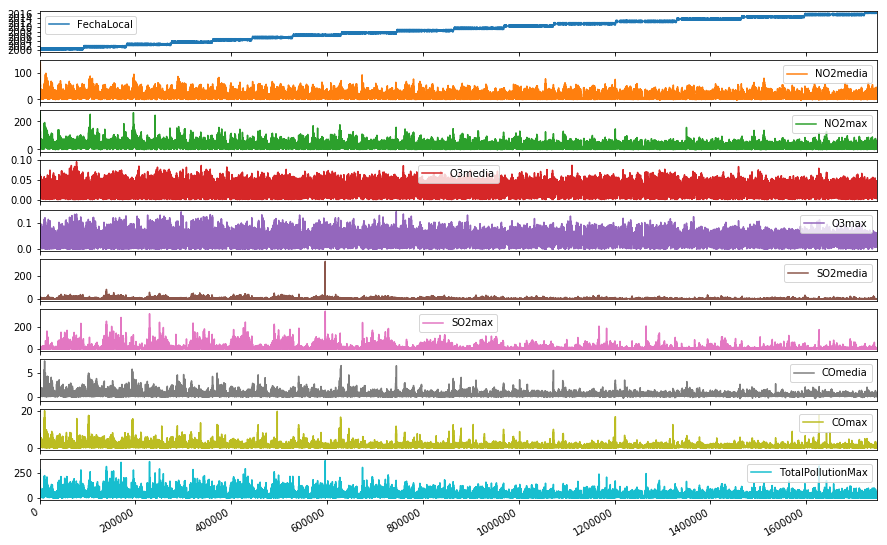

In [20]:
out = p.plot(subplots=True, figsize = (15, 10))

In [21]:
# Para ver mejor los graficos en el Notebook
from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')

In [22]:
# Copio una muestra aleatoria de 3000 datos para cargar mejor los resultados
dat = p.sample(3000, random_state=1234).copy()
dat.head()

,Direccion,Estado,Ciudad,FechaLocal,NO2media,NO2max,O3media,O3max,SO2media,SO2max,COmedia,COmax,TotalPollutionMax
141323,COUNTY RD 1103 .7 MI SOUTH OF K-52,Kansas,Not in a city,2001-08-26,2.708333,13.0,0.024333,0.047,0.962500,3.0,0.133333,0.2,16.247
696469,"Howard University's Beltsville Laboratory, 120...",Maryland,Beltsville,2007-10-09,15.333333,34.0,0.034000,0.066,2.087500,10.3,0.320833,0.4,44.766
1476352,1100 21st Street,California,Oakland,2014-02-24,22.134783,32.9,0.017333,0.024,0.886364,2.6,0.604348,1.8,37.324
1620372,"2850 MESA VERDE DR EAST, COSTA MESA",California,Costa Mesa,2015-05-26,2.977273,7.9,0.045625,0.049,0.000000,0.0,0.100000,0.1,8.049
1446367,1415 Hinton Street,Texas,Dallas,2013-04-24,6.579167,15.3,0.037667,0.047,-0.025000,0.0,0.200000,0.2,15.547


In [23]:
#Importamos subplots
import matplotlib.pyplot as plt


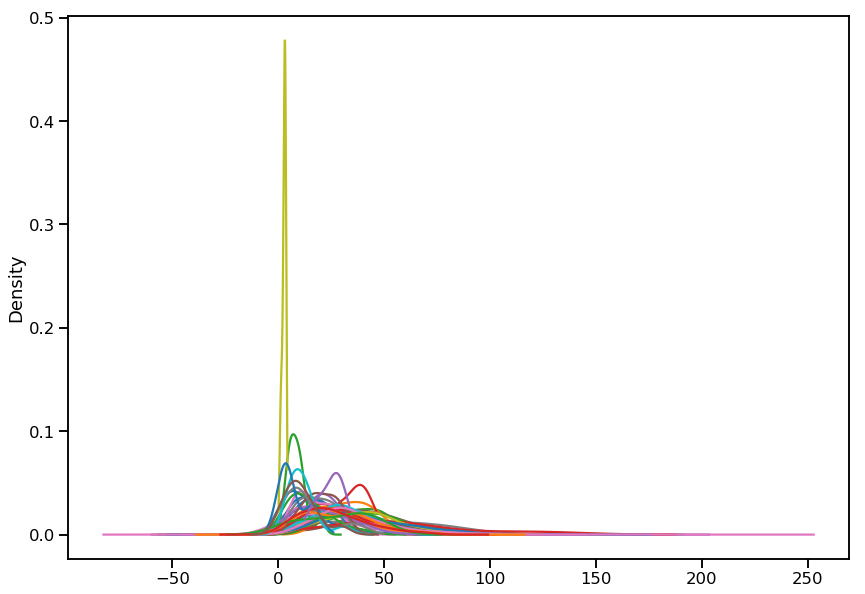

In [38]:
#Contaminacio maxima total por Estados
fig, ax = plt.subplots()
out01 = dat.groupby('Estado').plot(kind='kde', x='FechaLocal', y='TotalPollutionMax', ax=ax, legend = False)

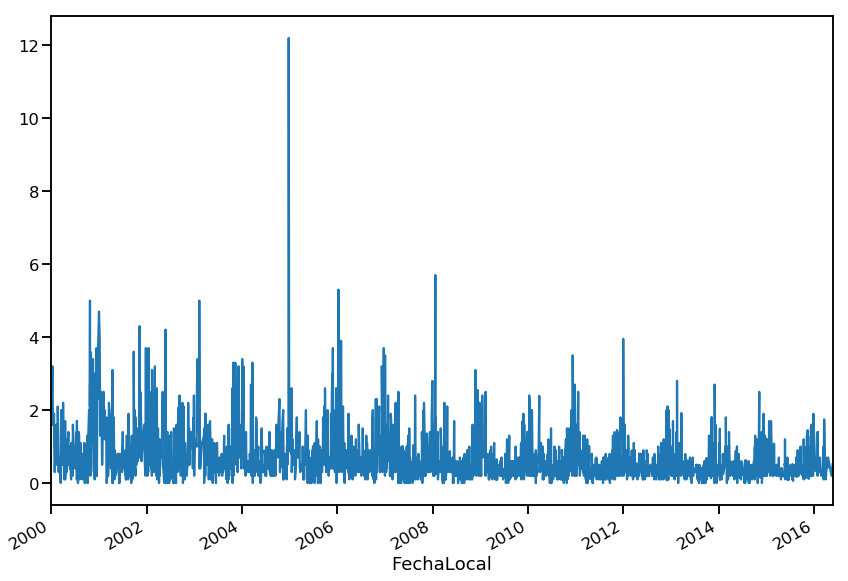

In [41]:
out02 = dat.plot(kind='Line', x='FechaLocal', y='COmax', legend = False)

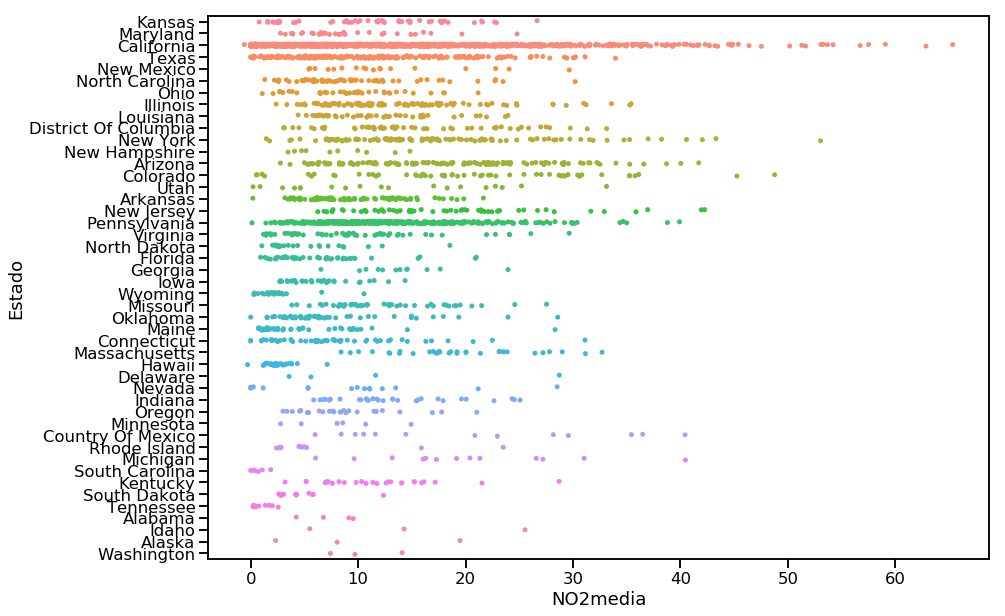

In [25]:
# Dispersion de la media de NO2 en los diferentes Estados
out_NO2 = sns.stripplot(x='NO2media', y='Estado', data=dat)

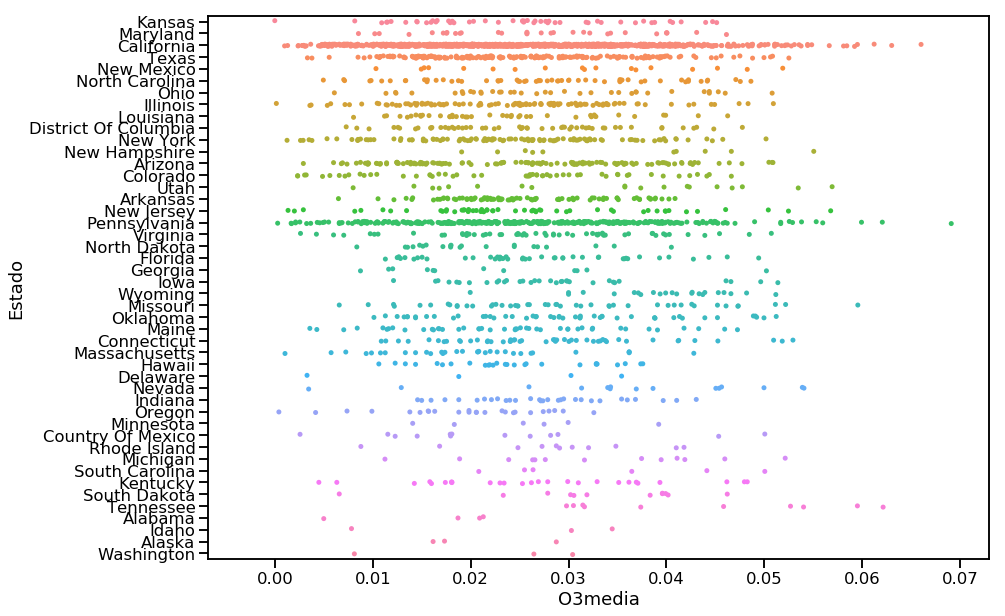

In [26]:
# Dispersion de la media de O3 en los diferentes Estados
out_O3 = sns.stripplot(x='O3media', y='Estado', data=dat)

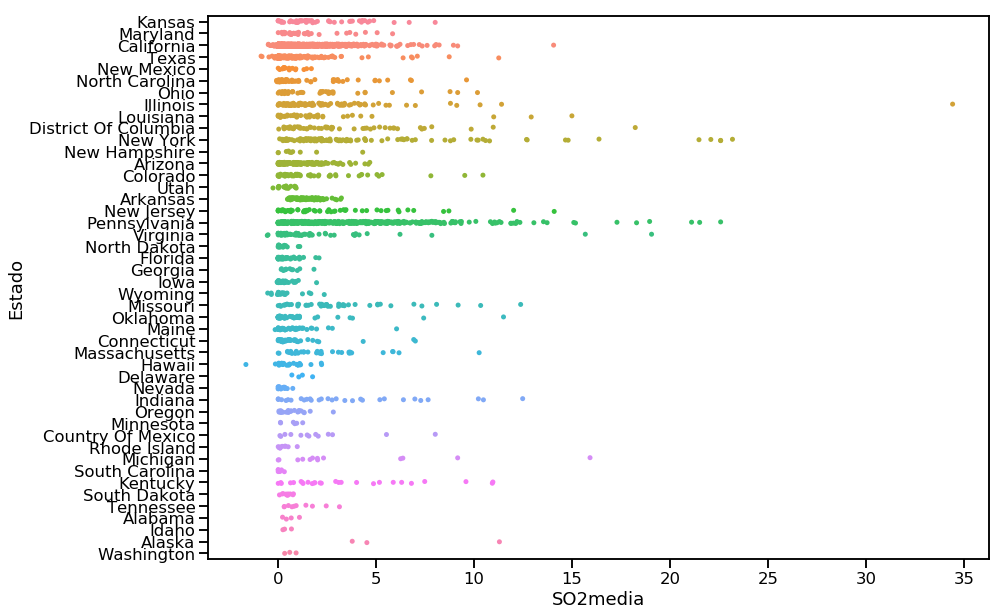

In [27]:
# Dispersion de la media de SO2 en los diferentes Estados
out_SO2 = sns.stripplot(x='SO2media', y='Estado', data=dat)

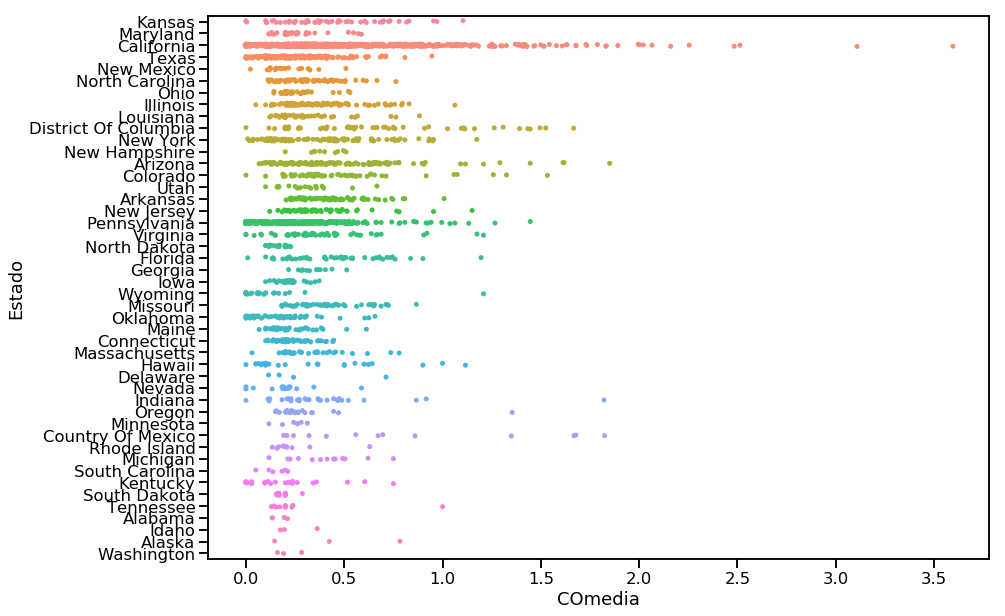

In [28]:
# Dispersion de la media de CO en los diferentes Estados
out_CO = sns.stripplot(x='COmedia', y='Estado', data=dat)

In [29]:
#out = sns.countplot(y='Estado', data=dat, axes_style("whitegrid"))

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


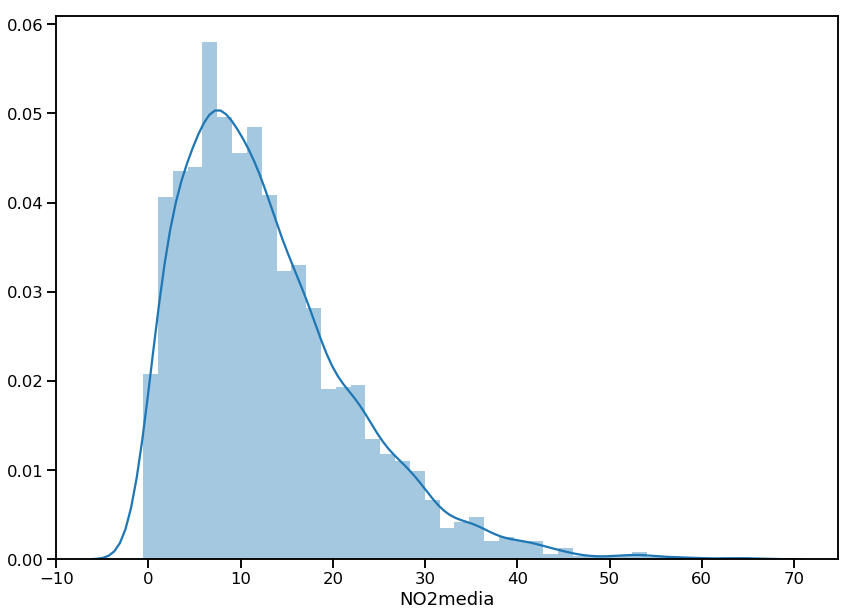

In [30]:
# Distribucion de NO2media
distNO2 = sns.distplot(dat.NO2media)

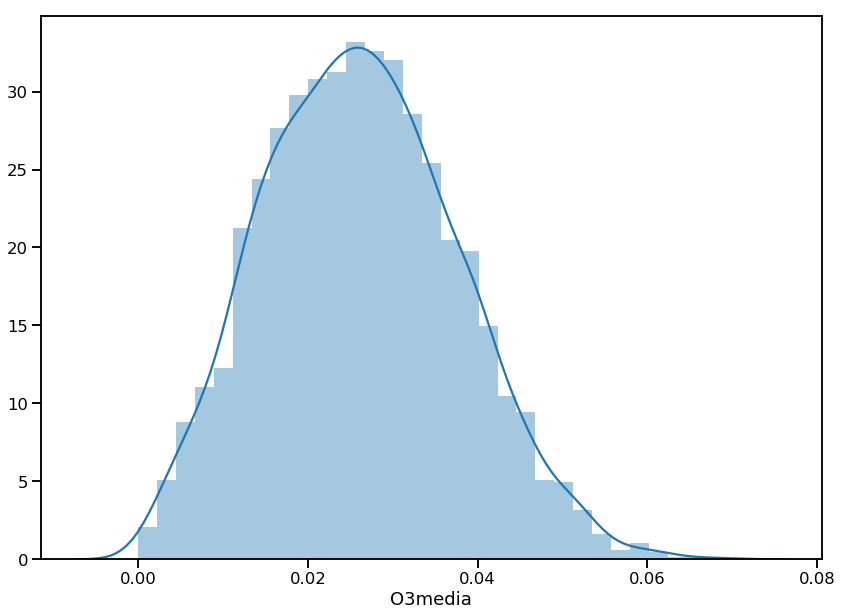

In [31]:
# Distribucion de O3media
distO3 = sns.distplot(dat.O3media)

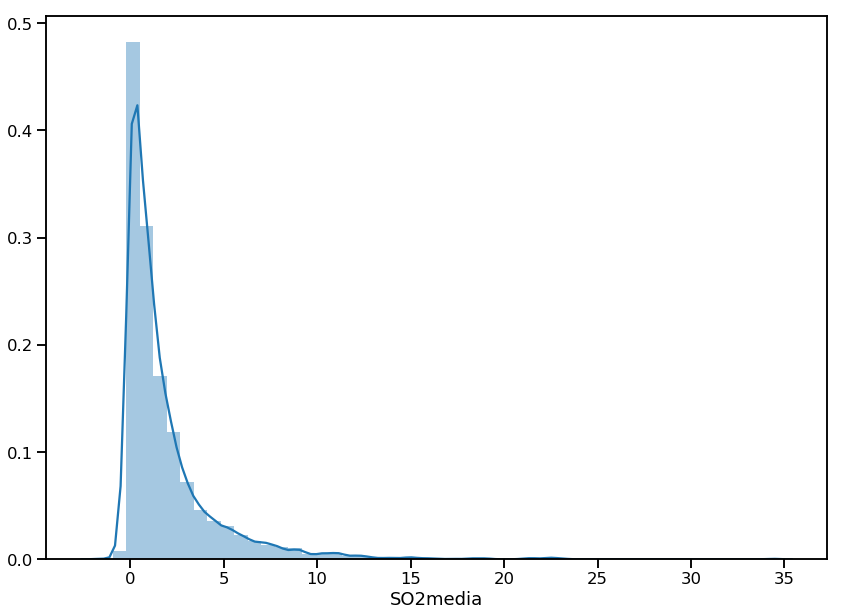

In [32]:
# Distribucion de SO2media
distSO2 = sns.distplot(dat.SO2media)

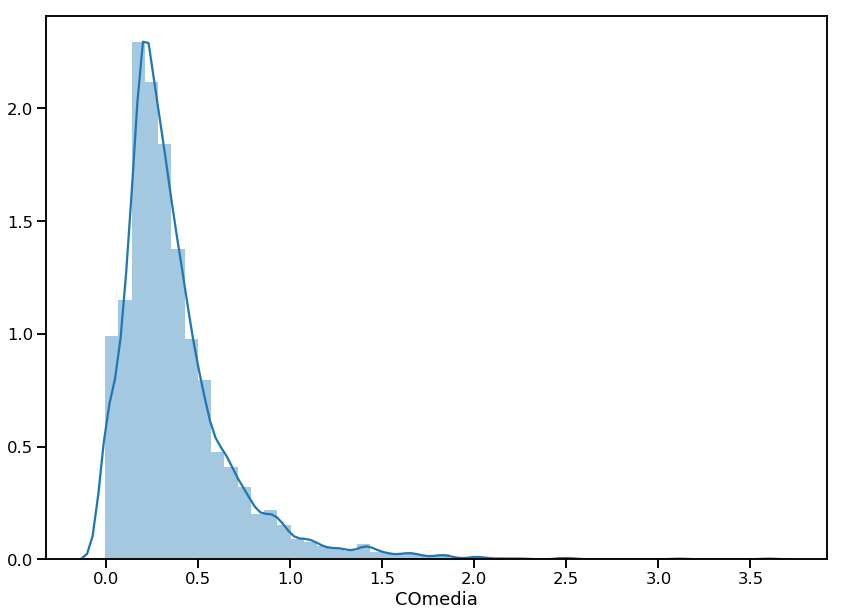

In [33]:
# Distribucion de COmedia
distCO = sns.distplot(dat.COmedia)

In [34]:
#out = sns.barplot(x="FechaLocal", y="NO2media", hue="Estado", data=dat)

In [ ]:
#histogrma de ultimo año de California con 3 ciudades
